In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

df = pd.concat([X, y], axis=1)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


/tmp/ipython-input-4-2764840134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


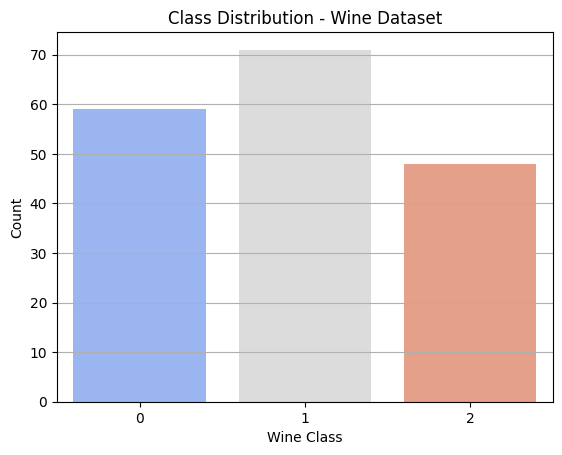

In [4]:
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Class Distribution - Wine Dataset")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


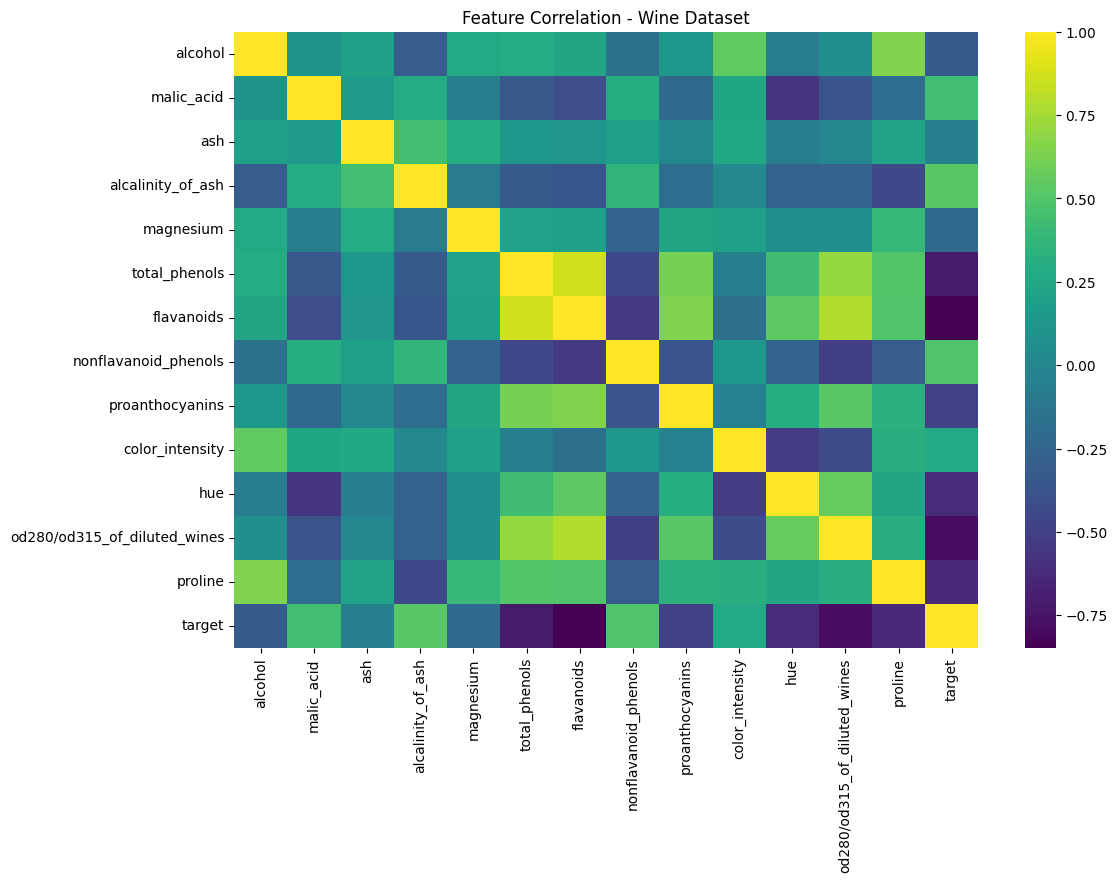

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title("Feature Correlation - Wine Dataset")
plt.show()


In [6]:
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print("CV Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(scores) * 100))


CV Scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
Mean Accuracy: 97.21%


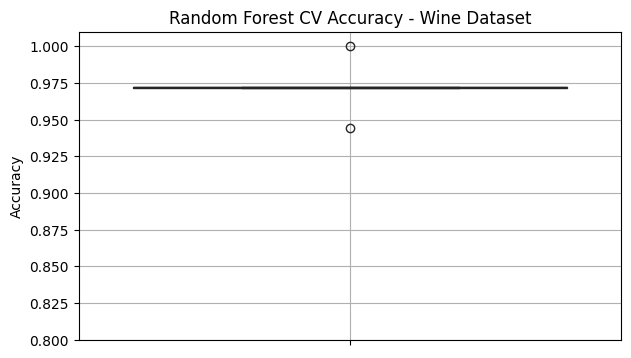

In [7]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=scores, color='purple')
plt.title("Random Forest CV Accuracy - Wine Dataset")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.01)
plt.grid(True)
plt.show()
